# Welcome to Tapy

<img src="pics/TaPy_logo.png"  width="250" height="250"/>

This notebook will illustrate the use of the TaPy library by going through a typical analysis

## Set up system

In [31]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
%matplotlib notebook

Add TaPy to python path

In [2]:
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import tapy
from tapy.grating_interferometer import GratingInterferometer
from tapy.roi import ROI

## Data Folders

Open Beam data path

In [3]:
path_ob = '../data/data_OB/'
assert os.path.exists(path_ob)

Sample data path

In [4]:
path_im = '../data/data_smp'
assert os.path.exists(path_im)

Dark Current data path

In [5]:
path_df = '../data/data_df'
assert os.path.exists(path_df)

## Loading Data 

In [6]:
o_grating = GratingInterferometer()
o_grating.load(folder=path_im)
o_grating.load(folder=path_ob, data_type='ob')
o_grating.load(folder=path_df, data_type='df')

## Dark Field (DF) correction 

In [ ]:
o_grating.df_correction()

## Normalization of the data 

We will use a normalization ROI.
```
 x0 = 3
 y0 = 5
 width = 20
 height = 40
```

In [7]:
norm_roi = ROI(x0=3, y0=5, width=20, height=40)
o_grating.normalization(roi=norm_roi)

True

## Calculate and display oscillation

In [34]:
x0=30
y0=0
width=1
height=1

osc_roi = ROI(x0=x0, y0=y0, width=width, height=height)
o_grating.oscillation(roi=osc_roi)

sample_oscillation = o_grating.data['sample']['oscillation']
ob_oscillation = o_grating.data['ob']['oscillation']

<IPython.core.display.Javascript object>


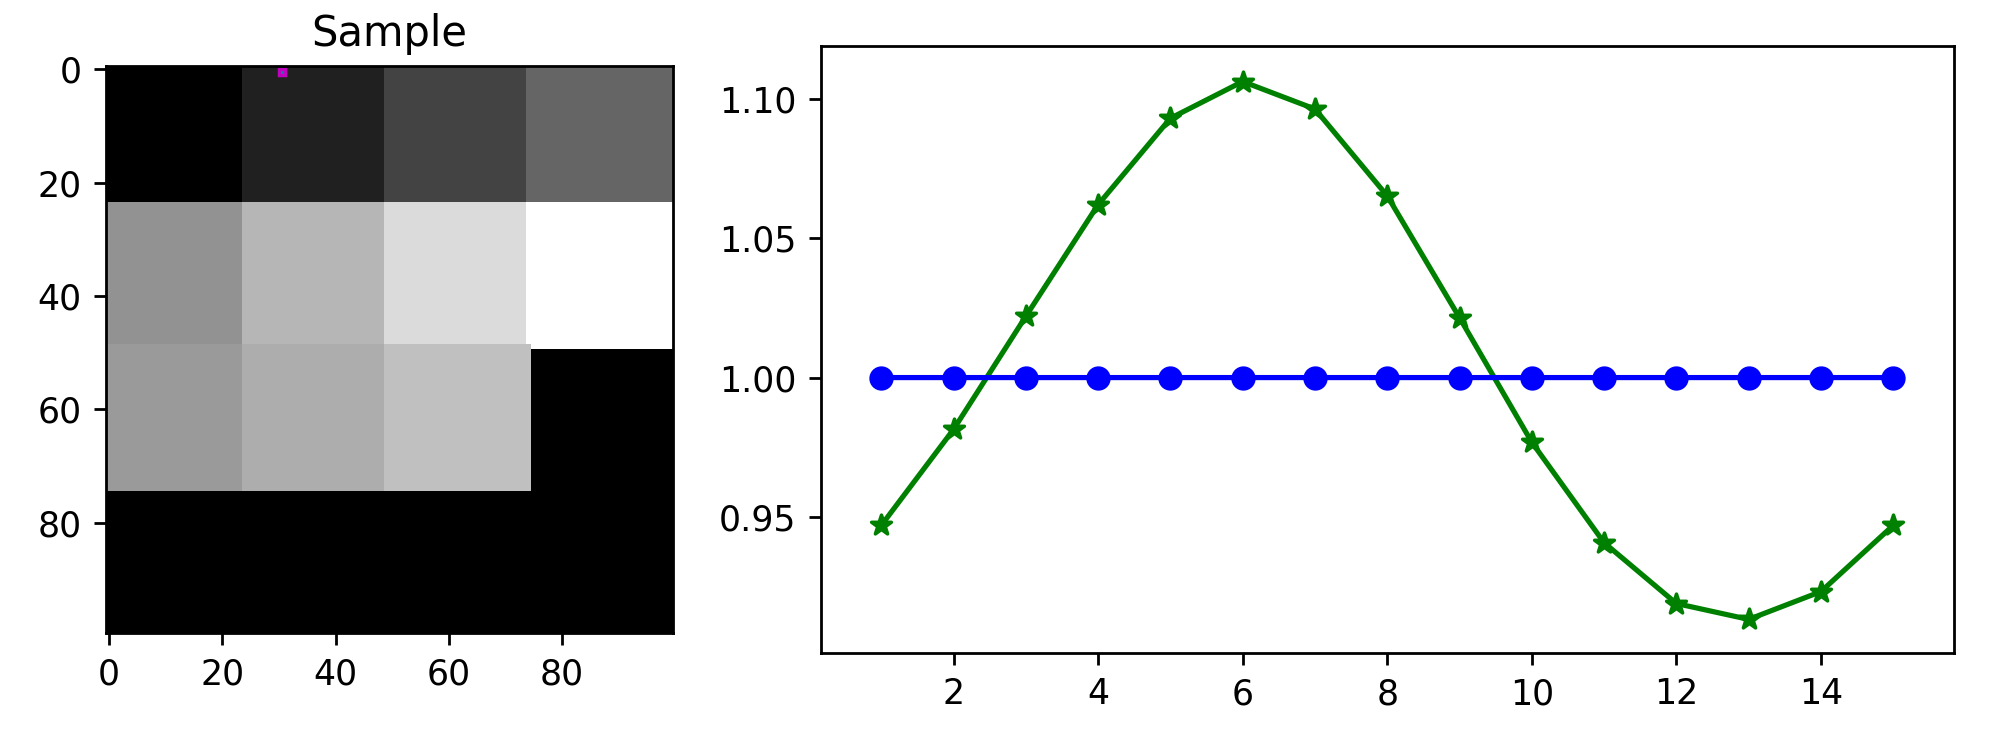

In [35]:
im = o_grating.data['sample']['normalized'][0]
vmin,vmax=im.min(),im.max()
cmap='gray'
        
fig = plt.figure(figsize=[8,3])
gs = gridspec.GridSpec(1,2, width_ratios=[1,2])
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# sample 0 with oscillation ROI
ax.imshow(im,vmin=vmin, vmax=vmax,interpolation='nearest',cmap=cmap)
rectNorm = patches.Rectangle((x0,y0), width, height, linewidth=1, edgecolor='m')
ax.add_patch(rectNorm)
ax.set_title("Sample")

# oscillation 
range_sample = np.arange(1, len(sample_oscillation)+1)
ax2.plot(range_sample, sample_oscillation, color='g', label='sample')
ax2.scatter(range_sample, sample_oscillation, marker='*', color='g')

range_ob = np.arange(1, len(ob_oscillation)+1)
ax2.plot(range_ob, ob_oscillation, color='b', label='ob')
ax2.scatter(range_ob, ob_oscillation, color='b')

plt.show()
plt.tight_layout()

In [23]:
rectNorm = patches.Rectangle((x0,y0),width,height,linewidth=1,edgecolor='m',facecolor='none')
ax.add_patch(rectNorm)
ax.set_title("Sample")
rangeim = range(1,len(sample_oscillation)+1)
ax2.plot(rangeim,sample_oscillation,color='g',label='data')
ax2.scatter(rangeim,sample_oscillation,marker='*',color='g')
rangeob = range(1,len(ob_oscillation)+1)
ax2.plot(rangeob,ob_oscillation,color='b',label='ob')
ax2.scatter(rangeob,ob_oscillation,color='b')
ax2.legend(loc=1, shadow=True)
ax2.set_title('Oscillation plot')
#ax2.set_xlim((0,len(ob_oscillation_)+2))
ax2.grid(True)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

ValueError: Expected the given number of height ratios to match the number of rows of the grid